# PROJECT 2(Unsupervised ML)

# Importing the libraries

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("c:\\iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
x=df[['PetalLengthCm','PetalWidthCm']]
x.head()

,PetalLengthCm,PetalWidthCm
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


# Scaling

In [4]:
scaler=MinMaxScaler()
scaler.fit(df[['PetalLengthCm']])
df['PetalLengthCm']=scaler.transform(df[['PetalLengthCm']])

In [5]:
scaler.fit(df[['PetalWidthCm']])
df['PetalWidthCm']=scaler.transform(df[['PetalWidthCm']])

# Plot

Text(0, 0.5, 'PetalWidth(Cm)')

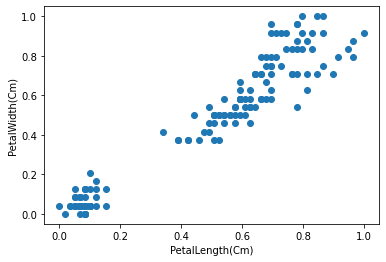

In [16]:
plt.scatter(df['PetalLengthCm'],df['PetalWidthCm'])
plt.xlabel('PetalLength(Cm)')
plt.ylabel('PetalWidth(Cm)')

# Elbow method

In [7]:
k_rng=range(1,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['PetalLengthCm','PetalWidthCm']])
    sse.append(km.inertia_)

In [8]:
sse

[28.391514358368717,
 5.179687509974783,
 1.7050986081225123,
 1.1621031930971286,
 0.8570856553216398,
 0.6833274904190353,
 0.5695755692202201,
 0.4894028548646667,
 0.41516838349319574]

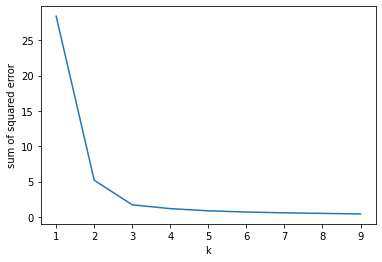

In [9]:
plt.xlabel('k')
plt.ylabel('sum of squared error')
plt.plot(k_rng,sse)

# Model fitting

In [10]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [11]:
y_predicted=km.fit_predict(df[['PetalLengthCm','PetalWidthCm']])
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
df['clusters']=y_predicted
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,clusters
0,1,5.1,3.5,0.067797,0.041667,Iris-setosa,0
1,2,4.9,3.0,0.067797,0.041667,Iris-setosa,0
2,3,4.7,3.2,0.050847,0.041667,Iris-setosa,0
3,4,4.6,3.1,0.084746,0.041667,Iris-setosa,0
4,5,5.0,3.6,0.067797,0.041667,Iris-setosa,0
...,...,...,...,...,...,...,...
145,146,6.7,3.0,0.711864,0.916667,Iris-virginica,2
146,147,6.3,2.5,0.677966,0.750000,Iris-virginica,2
147,148,6.5,3.0,0.711864,0.791667,Iris-virginica,2
148,149,6.2,3.4,0.745763,0.916667,Iris-virginica,2


In [13]:
m=df[df.clusters==0]
y=df[df.clusters==1]
z=df[df.clusters==2]

# Scatter plot(3 Clusters)

Text(0, 0.5, 'PetalWidthCm')

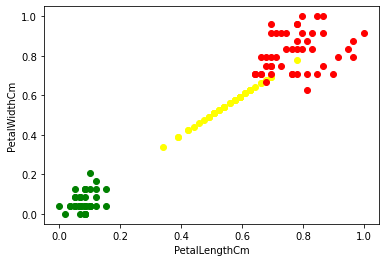

In [14]:
plt.scatter(m['PetalLengthCm'],m['PetalWidthCm'],color='green')
plt.scatter(y['PetalLengthCm'],y['PetalLengthCm'],color='yellow')
plt.scatter(z['PetalLengthCm'],z['PetalWidthCm'],color='red')

plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')


# Centroid

In [17]:
km.cluster_centers_

array([[0.07864407, 0.06      ],
       [0.55867014, 0.51041667],
       [0.7740113 , 0.81510417]])

Text(0, 0.5, 'PetalWidthCm')

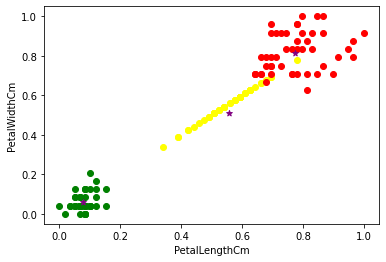

In [18]:
plt.scatter(m['PetalLengthCm'],m['PetalWidthCm'],color='green')
plt.scatter(y['PetalLengthCm'],y['PetalLengthCm'],color='yellow')
plt.scatter(z['PetalLengthCm'],z['PetalWidthCm'],color='red')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')


# Sepal

In [19]:
x1=df[['SepalLengthCm','SepalWidthCm']]
x1.head()

,SepalLengthCm,SepalWidthCm
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


# Scaling

In [20]:
scaler=MinMaxScaler()
scaler.fit(df[['SepalLengthCm']])
df['SepalLengthCm']=scaler.transform(df[['SepalLengthCm']])

In [21]:
scaler.fit(df[['SepalWidthCm']])
df['SepalWidthCm']=scaler.transform(df[['SepalWidthCm']])

# Plot

Text(0, 0.5, 'SepalWidth(Cm)')

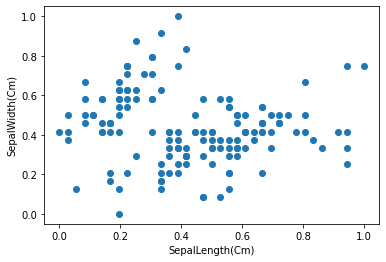

In [23]:
plt.scatter(df['SepalLengthCm'],df['SepalWidthCm'])
plt.xlabel('SepalLength(Cm)')
plt.ylabel('SepalWidth(Cm)')

# Elbow method

In [24]:
k_rng=range(1,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['SepalLengthCm','SepalWidthCm']])
    sse.append(km.inertia_)

In [25]:
sse

[12.746657664609057,
 6.850052259749757,
 4.131846697085131,
 3.2506119510990272,
 2.5381592507996253,
 2.0843392148307442,
 1.8126523070429377,
 1.5287805413467577,
 1.3274039005193952]

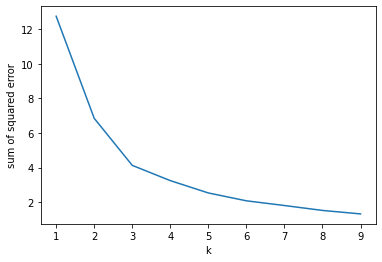

In [26]:
plt.xlabel('k')
plt.ylabel('sum of squared error')
plt.plot(k_rng,sse)

# Model fitting

In [28]:
km=KMeans(n_clusters=5)
km

KMeans(n_clusters=5)

In [29]:
y_predicted=km.fit_predict(df[['SepalLengthCm','SepalWidthCm']])
y_predicted

array([3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 2, 2, 2, 3, 2, 2, 3, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 3, 3, 1, 3, 3,
       2, 3, 2, 3, 2, 3, 0, 4, 0, 1, 4, 1, 4, 1, 4, 1, 1, 4, 1, 4, 1, 4,
       1, 1, 1, 1, 4, 4, 1, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 4, 4, 1,
       1, 1, 1, 4, 1, 1, 1, 1, 1, 4, 1, 1, 4, 1, 0, 4, 4, 0, 1, 0, 4, 0,
       4, 4, 4, 1, 1, 4, 4, 0, 0, 1, 0, 1, 0, 4, 4, 0, 4, 4, 4, 0, 0, 0,
       4, 4, 1, 0, 4, 4, 4, 0, 4, 0, 1, 4, 4, 4, 1, 4, 4, 4])

In [30]:
df['clusters']=y_predicted
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,clusters
0,1,0.222222,0.625000,0.067797,0.041667,Iris-setosa,3
1,2,0.166667,0.416667,0.067797,0.041667,Iris-setosa,3
2,3,0.111111,0.500000,0.050847,0.041667,Iris-setosa,3
3,4,0.083333,0.458333,0.084746,0.041667,Iris-setosa,3
4,5,0.194444,0.666667,0.067797,0.041667,Iris-setosa,3
...,...,...,...,...,...,...,...
145,146,0.666667,0.416667,0.711864,0.916667,Iris-virginica,4
146,147,0.555556,0.208333,0.677966,0.750000,Iris-virginica,1
147,148,0.611111,0.416667,0.711864,0.791667,Iris-virginica,4
148,149,0.527778,0.583333,0.745763,0.916667,Iris-virginica,4


In [31]:
n=df[df.clusters==0]
s=df[df.clusters==1]
r=df[df.clusters==2]
p=df[df.clusters==3]
k=df[df.clusters==4]

# Scatter plot(5 clustes)

Text(0, 0.5, 'SepalWidthCm')

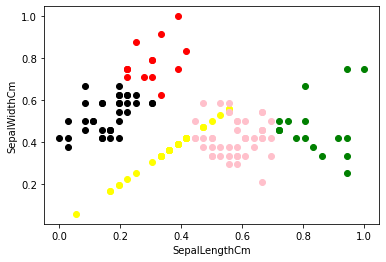

In [32]:
plt.scatter(n['SepalLengthCm'],n['SepalWidthCm'],color='green')
plt.scatter(s['SepalLengthCm'],s['SepalLengthCm'],color='yellow')
plt.scatter(r['SepalLengthCm'],r['SepalWidthCm'],color='red')
plt.scatter(p['SepalLengthCm'],p['SepalWidthCm'],color='black')
plt.scatter(k['SepalLengthCm'],k['SepalWidthCm'],color='pink')

plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')


# Centroid

In [33]:
km.cluster_centers_

array([[0.83660131, 0.47058824],
       [0.36752137, 0.24358974],
       [0.29960317, 0.7827381 ],
       [0.15873016, 0.52738095],
       [0.57777778, 0.4212963 ]])

Text(0, 0.5, 'SepalWidthCm')

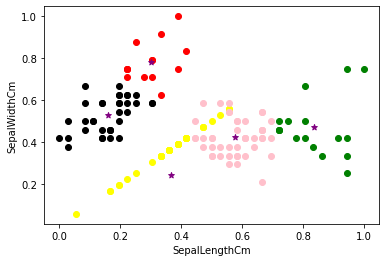

In [34]:
plt.scatter(n['SepalLengthCm'],n['SepalWidthCm'],color='green')
plt.scatter(s['SepalLengthCm'],s['SepalLengthCm'],color='yellow')
plt.scatter(r['SepalLengthCm'],r['SepalWidthCm'],color='red')
plt.scatter(p['SepalLengthCm'],p['SepalWidthCm'],color='black')
plt.scatter(k['SepalLengthCm'],k['SepalWidthCm'],color='pink')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
